In [1]:
import logging


logging.basicConfig(level=logging.INFO)

# Siamese Convolutional Neural Network Tests

In [3]:
%matplotlib inline
from itertools import islice

import matplotlib.pyplot as plt
import numpy as np
from video699.screen.annotated import AnnotatedScreenDetector
from video699.video.annotated import get_videos
from video699.configuration import get_configuration


CONFIGURATION = get_configuration()['KerasSiamesePageDetector']


def get_nth(iterator, n):
    return next(islice(iterator, n - 1, n))

In [4]:
from video699.event.siamese import _KerasSiameseNeuralNetwork


model = _KerasSiameseNeuralNetwork()

Using TensorFlow backend.
INFO:video699.event.siamese:Loaded a model from /root/video699/video699/event/siamese/pretrained


In [5]:
video = get_videos()['https://is.muni.cz/auth/el/1433/jaro2016/IV109/um/vi/?videomuni=IV109-D2-20160406.mp4']
frame = get_nth(video, 8)
screen, *_ = sorted(
    AnnotatedScreenDetector('fimu', 'd2', 'default_2004').detect(frame),
    key=lambda screen: screen.coordinates,
)
correct_page = get_nth(video.documents['slides02.pdf'], 3)
incorrect_page = get_nth(video.documents['slides01.pdf'], 7)

## Testing `_KerasSiameseNeuralNetwork.get_screen_features()`

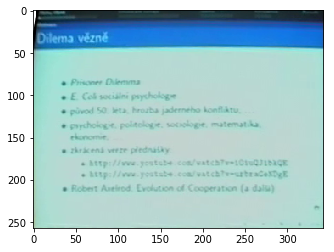

In [6]:
plt.imshow(screen.image)

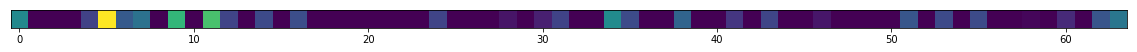

In [7]:
_, screen_features = next(model.get_screen_features([screen]))
plt.figure(figsize=(20, 10))
plt.yticks([])
plt.imshow(np.expand_dims(screen_features, axis=0))
plt.savefig('figures/siamese-01.pdf')

## Testing `_KerasSiameseNeuralNetwork.get_page_features()`

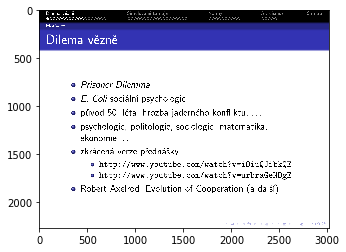

In [8]:
plt.imshow(correct_page.image)

L2 distance between screen_features, and correct_page_features: 1.3390604257583618


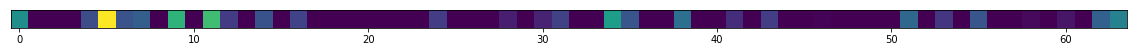

In [9]:
_, correct_page_features = next(model.get_page_features([correct_page]))
plt.figure(figsize=(20, 10))
plt.yticks([])
plt.imshow(np.expand_dims(correct_page_features, axis=0))
print(
    'L2 distance between screen_features, and correct_page_features: {}'.format(
        np.linalg.norm(correct_page_features - screen_features)
    )
)
plt.savefig('figures/siamese-02.pdf')

***

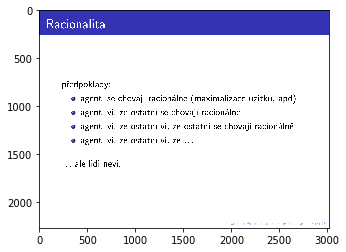

In [10]:
plt.imshow(incorrect_page.image)

L2 distance between screen_features, and incorrect_page_features: 10.914047241210938


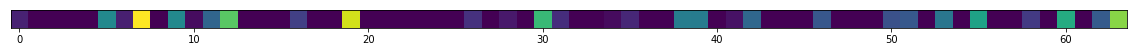

In [11]:
_, incorrect_page_features = next(model.get_page_features([incorrect_page]))
plt.figure(figsize=(20, 10))
plt.yticks([])
plt.imshow(np.expand_dims(incorrect_page_features, axis=0))
print(
    'L2 distance between screen_features, and incorrect_page_features: {}'.format(
        np.linalg.norm(incorrect_page_features - screen_features)
    )
)
plt.savefig('figures/siamese-03.pdf')

## Testing `_KerasSiameseNeuralNetwork.threshold_distances()`

In [12]:
pages = (correct_page, incorrect_page)
threshold_distances = model.threshold_distances(np.array([
    np.linalg.norm(page_features - screen_features)
    for page, page_features in model.get_page_features(pages)
]))

for page, matches_screen in zip(pages, threshold_distances):
    print('{} {} the screen.'.format(
        'correct_page' if page is correct_page else 'incorrect_page',
        'matches' if matches_screen else 'does not match'
    ))

correct_page matches the screen.
incorrect_page does not match the screen.
